In [3]:
import geopandas as gpd
import rasterio
from rasterio.features import geometry_mask
from shapely.geometry import shape
from shapely.ops import unary_union
import glob,re, os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


colors = [(0, 0.5, 0), (1, 1, 1)]
cmap = LinearSegmentedColormap.from_list('white_to_dark_green', colors, N=256)

land_cover_gdf_N = gpd.read_file('geonetwork_landcover_nga_gc_adg/nga_gc_adg.shp')
land_cover_gdf_C = gpd.read_file('geonetwork_landcover_cmr_gc_adg/cmr_gc_adg.shp')

forest=[92, 91, 90, 70, 60, 50, 42, 41, 40, 120, 110, 102, 101, 100]
land_cover_gdf_N=land_cover_gdf_N[land_cover_gdf_N["GRIDCODE"].isin(forest)]
land_cover_gdf_N["Country"]="Nigeria"
land_cover_gdf_C=land_cover_gdf_C[land_cover_gdf_C["GRIDCODE"].isin(forest)]
land_cover_gdf_C["Country"]="Cameroon"

combined_gdf = gpd.GeoDataFrame(pd.concat([land_cover_gdf_N, land_cover_gdf_C]))

nigeria = gpd.read_file('Nigeria.geojson')
cameroon = gpd.read_file('Cameroon.geojson')

border = gpd.overlay(nigeria, cameroon, how='intersection')
abia_state = nigeria[nigeria['admin1Name'] == 'Abia']
akwa_ibom_state = nigeria[nigeria['admin1Name'] == 'Akwa Ibom']
oyo_state = nigeria[nigeria['admin1Name'] == 'Oyo']

79060
87169
166229


In [7]:
cameroon = gpd.read_file('Cameroon.geojson')
NW = cameroon[cameroon['shapeName'] == 'North-West']
SW = cameroon[cameroon['shapeName'] == 'South-West']
CE = cameroon[cameroon['shapeName'] == 'Centre']

In [8]:
import geopandas as gpd
from shapely.geometry import Point

points_data=pd.read_csv("MYMAPS_Mpox-Clade2B.csv")
points_data=pd.DataFrame([re.sub("\(","", xx.split(" ")[1]) for xx in points_data["WKT"]], [re.sub("\)","", xx.split(" ")[2]) for xx in points_data["WKT"]]).reset_index()[[0, "index"]]
points_data.columns=["longitude", "latitude"]
geometry = [Point(xy) for xy in zip(points_data['longitude'], points_data['latitude'])]
points_geo = gpd.GeoDataFrame(points_data, geometry=geometry, crs='EPSG:3857')



In [10]:
river_data = gpd.read_file('NGA_rvrsl_1m_esri.shp')
san_riv=gpd.read_file("wmobb_rivers.json")
san_riv=san_riv[san_riv["WMOBB"]==138]

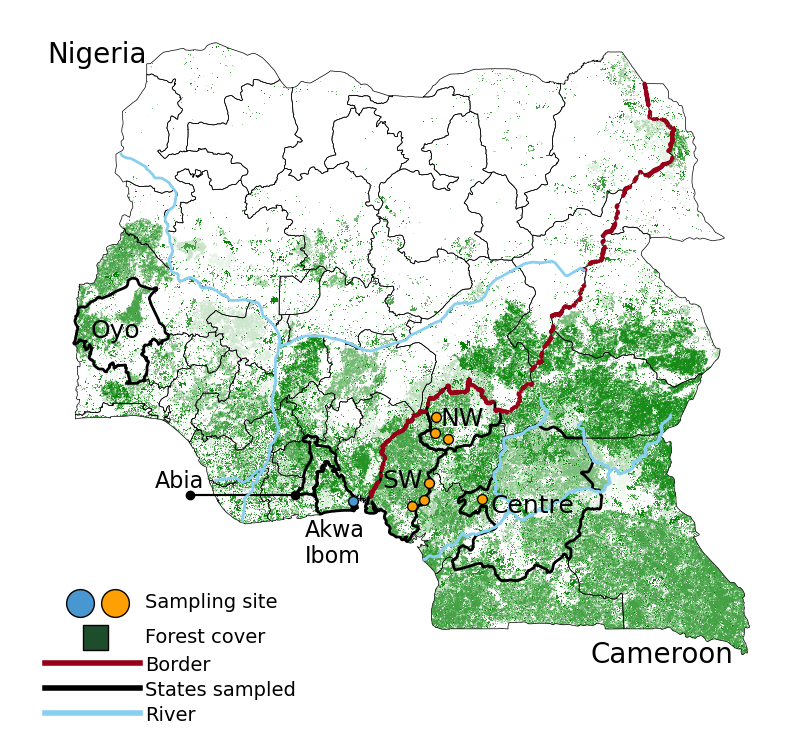

In [20]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patches as patches
mpl.rcParams['font.family'] = 'sans-serif'

fig, ax = plt.subplots(figsize=(10, 10))
river_data.plot(ax=ax, color='#89CFF0', linewidth=2, zorder=3)
san_riv.plot(ax=ax, color='#89CFF0', linewidth=2, zorder=3)
combined_gdf.plot(ax=ax, cmap=cmap, legend=True)
nigeria.boundary.plot(ax=ax, color=None, edgecolor='black', linewidth=0.5)
cameroon.boundary.plot(ax=ax, color=None, edgecolor='black', linewidth=0.5)
abia_state.boundary.plot(ax=ax, color='black', linewidth=2)
akwa_ibom_state.boundary.plot(ax=ax, color='black', linewidth=2)
oyo_state.boundary.plot(ax=ax, color='black', linewidth=2)
NW.boundary.plot(ax=ax, color='black', linewidth=2)
SW.boundary.plot(ax=ax, color='black', linewidth=2)
CE.boundary.plot(ax=ax, color='black', linewidth=2)
border.boundary.plot(ax=ax, color='#960018', linewidth=3)

plt.title('')
plt.xlabel('')
plt.ylabel('')

ax.text(2.15, 13.5, "Nigeria", size=20)
ax.text(13, 1.5, "Cameroon", size=20)
ax.text(11, 4.5, "Centre", size=18)
ax.text(10, 6.25, "NW", size=18)
ax.text(8.85, 5, "SW", size=18)
ax.text(7.3, 3.5, "Akwa\nIbom", size=16)
ax.text(4.3, 5, "Abia", size=16)
ax.text(3, 8, "Oyo", size=18)

plt.plot([5,7.1], [4.85,4.85], marker='o', linestyle='-', color="black")
plt.plot([5,7.1], [4.85,4.85], linestyle='-', color="black")

points_geo[points_geo["longitude"]!="8.2585607"].plot(ax=ax, marker='o', color='#FFA000', markersize=50, zorder=3, edgecolor='black')
points_geo[points_geo["longitude"]=="8.2585607"].plot(ax=ax, marker='o', color='#4997D0', markersize=50, zorder=3, edgecolor='black')


ax.set_yticklabels([])
ax.set_xticklabels([])
ax.tick_params(axis='y',size=0)
ax.tick_params(axis='x',size=0)
[ax.spines[loc].set_visible(False) for loc in ['top','right','left','bottom']]


plt.plot([2.1,4], [1,1], linestyle='-', color="black", linewidth=4 )
plt.plot([2.1,4], [1.5,1.5], linestyle='-', color="#960018", linewidth=4)
plt.plot([2.1,4], [0.5,0.5], linestyle='-', color="#89CFF0", linewidth=4)

rectangle = patches.Rectangle((2.85, 1.75), 0.5, 0.5, edgecolor='black', facecolor='#1E4D2B', linewidth=1)
ax.add_patch(rectangle)

ax.scatter(3.5,2.7,s=400,color='#FFA000',edgecolor='black')
ax.scatter(2.8,2.7,s=400,color='#4997D0',edgecolor='black')
ax.text(4.1, 1.9, "Forest cover", size=14)
ax.text(4.1, 2.6, "Sampling site", size=14)
ax.text(4.1, 1.5-0.15, "Border", size=14)
ax.text(4.1, 1-0.15, "States sampled", size=14)
ax.text(4.1, 0.5-0.15, "River", size=14)


#plt.show()

#
plt.savefig("Map.png",bbox_inches='tight', dpi=1000)   
